In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline
pd.set_option('display.max_columns', None)


In [102]:
df = pd.read_csv(r"C:\Users\artur\Documents\ny-housing-ml-llm\airflow_server\dags\data\ny_house_dataset.csv")

In [3]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [5]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

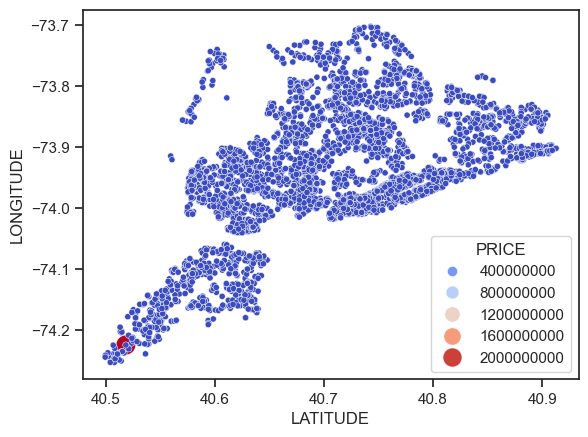

In [53]:
sns.scatterplot(data=df, x='LATITUDE', y='LONGITUDE', hue='PRICE', size='PRICE', palette='coolwarm', sizes=(20, 200))

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

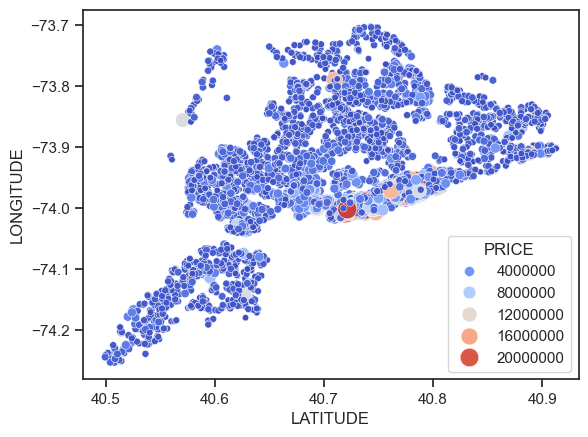

In [61]:
sns.scatterplot(data=df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)], x='LATITUDE', y='LONGITUDE', hue='PRICE', size='PRICE', palette='coolwarm', sizes=(20, 200))

<Axes: xlabel='PRICE'>

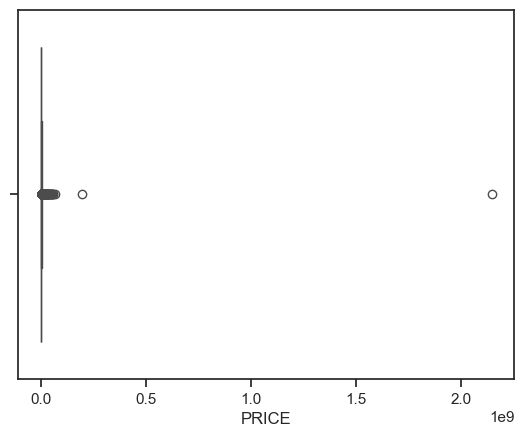

In [54]:
sns.boxplot(data=df, x='PRICE')

<Axes: xlabel='PRICE'>

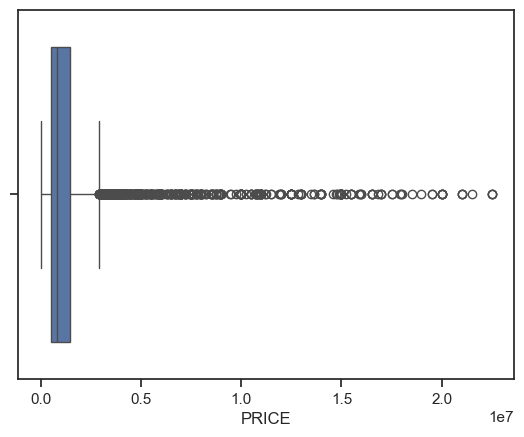

In [60]:
sns.boxplot(data=df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)], x='PRICE')

In [103]:
bath_beds_ratio = df["BATH"] / df["BEDS"]
bath_sqrt_ratio = df["BATH"] / df['PROPERTYSQFT']
beds_sqrt_ratio = df["BEDS"] / df['PROPERTYSQFT']

df["BATH_BEDS_RATIO"] = bath_beds_ratio
df["BATH_PROPERTYSQFT_RATIO"] = bath_sqrt_ratio
df["BEDS_PROPERTYSQFT_RATIO"] = beds_sqrt_ratio

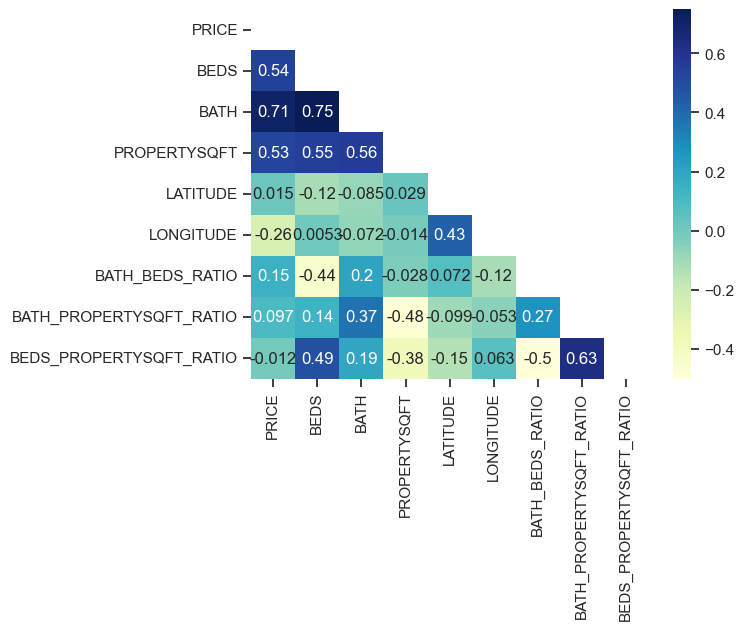

In [104]:
numeric_columns = [c for c in df.columns if df[c].dtype in ('float', 'int')]

mask = np.triu(np.ones_like(df[numeric_columns].corr(method='spearman')))
dataplot=sns.heatmap(df[numeric_columns].corr(method='spearman'), cmap="YlGnBu", annot=True, mask=mask)

In [105]:
df_exp = df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)]

mms = MinMaxScaler()

df_exp[numeric_columns] = mms.fit_transform(df_exp[numeric_columns])

C:\Users\artur\AppData\Local\Temp\ipykernel_82884\3803373878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[numeric_columns] = mms.fit_transform(df_exp[numeric_columns])


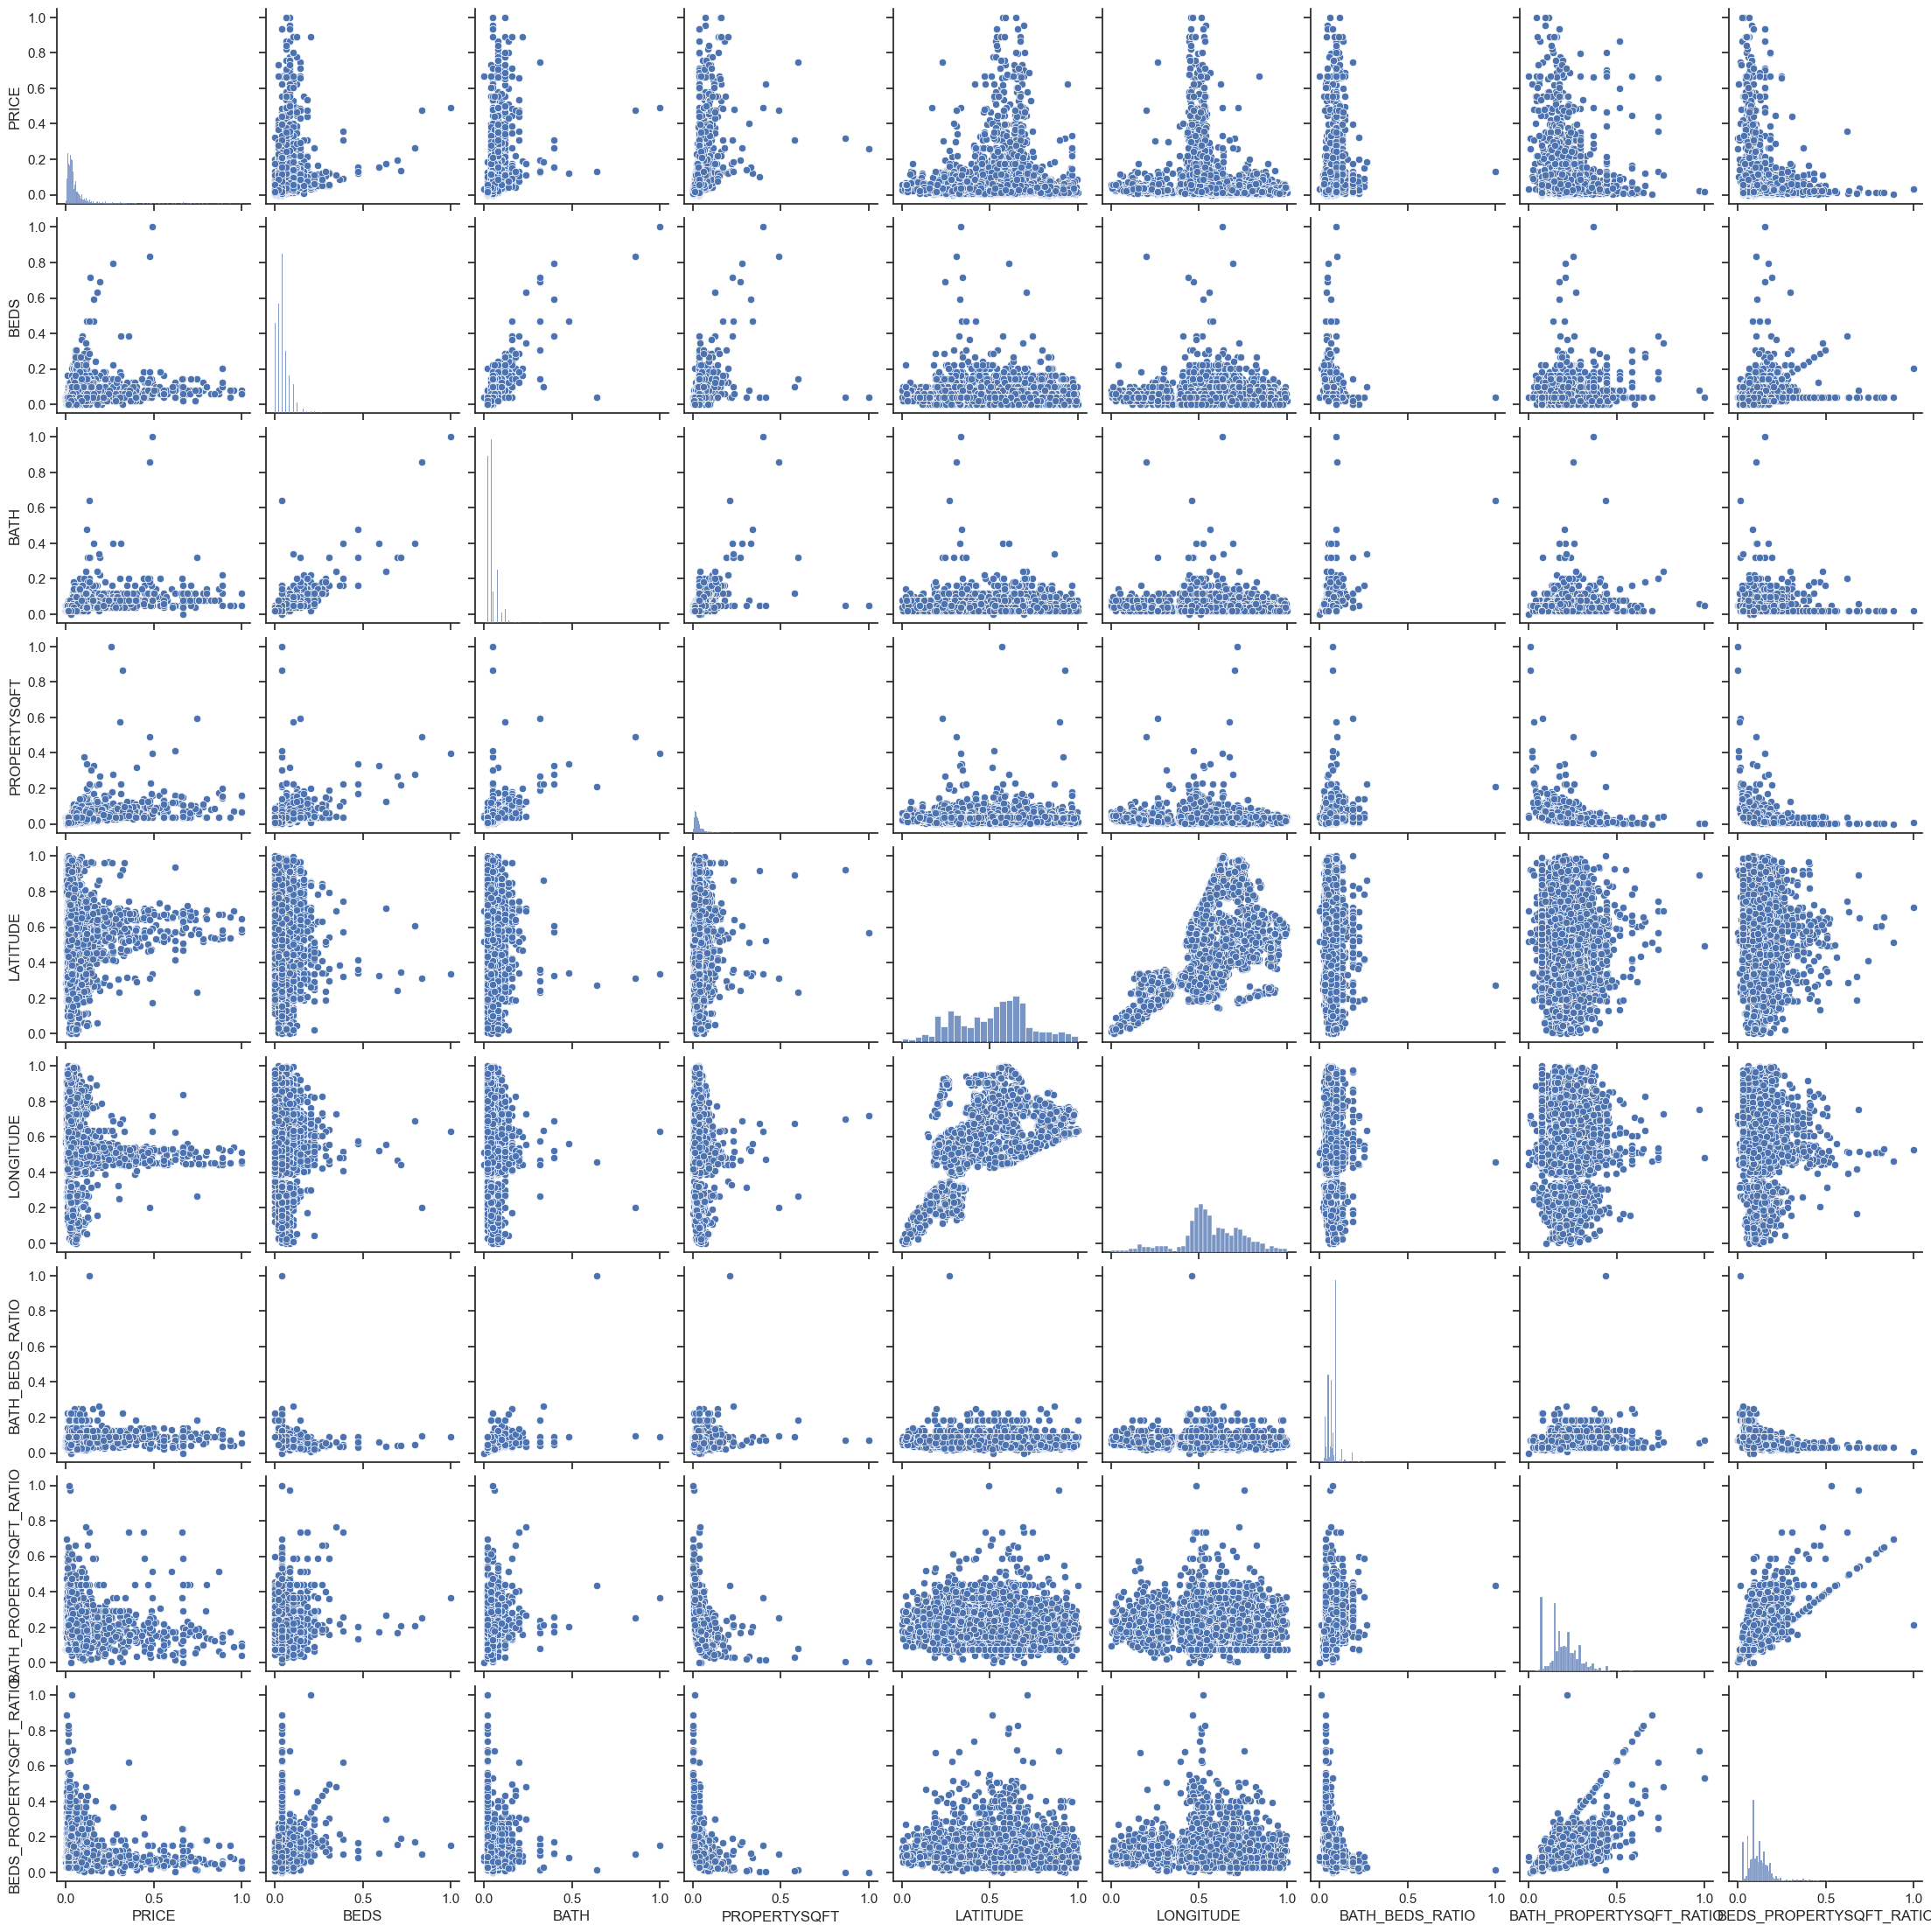

In [106]:
sns.pairplot(data=df_exp)

In [110]:
df = df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)]

y = df["PRICE"]
X = df[["BATH", "LATITUDE", "LONGITUDE", "BEDS_PROPERTYSQFT_RATIO"]]
#X = df[["BATH", "BEDS", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )


for model_type in ["xgboost", "random_forest"]:
    if model_type == "xgboost":
        model = xgb.XGBRegressor(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("====================================")
    print("====================================")
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"For {model_type}:\n")
    print(f"MSE = {round(mse, 2)}")
    print(f"MAE = {round(mae, 2)}\n")
    print("====================================")
    print("====================================")


For xgboost:

MSE = 1292462587904.0
MAE = 527932.38

For random_forest:

MSE = 1161023652969.42
MAE = 509029.29



In [111]:
y = df["PRICE"]
#X = df[["BATH", "LATITUDE", "LONGITUDE", "BEDS_PROPERTYSQFT_RATIO"]]
X = df[["BATH", "BEDS", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )


for model_type in ["xgboost", "random_forest"]:
    if model_type == "xgboost":
        model = xgb.XGBRegressor(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("====================================")
    print("====================================")
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"For {model_type}:\n")
    print(f"MSE = {round(mse, 2)}")
    print(f"MAE = {round(mae, 2)}\n")
    print("====================================")
    print("====================================")

For xgboost:

MSE = 839611252736.0
MAE = 450236.03

For random_forest:

MSE = 778240184442.8
MAE = 410393.25



In [132]:

import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.engine import URL
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

DB_USER='dbuser'
DB_PASSWORD='urlonRXlh5klx1sNLwWDcKY941tAzjsN'
DB_HOST='dpg-ctknah3v2p9s738a0hsg-a.virginia-postgres.render.com'
DB_PORT=5432
DB_NAME='db_ny_prices'

url = URL.create(
    drivername="postgresql",
    username=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME
)

select_query = f"""
        SELECT
            BROKERTITLE,
            TYPE,
            PRICE,
            BEDS,
            BATH,
            PROPERTYSQFT,
            ADDRESS,
            STATE,
            MAIN_ADDRESS,
            ADMINISTRATIVE_AREA_LEVEL_2,
            LOCALITY,
            SUBLOCALITY,
            STREET_NAME,
            LONG_NAME,
            FORMATTED_ADDRESS,
            LATITUDE,
            LONGITUDE
        FROM ny_datasets.original_data
    """

# Create engine
engine = create_engine(url)

with engine.begin() as connection:
    result = connection.execute(text(select_query))
    
    rows = result.fetchall()
    
    df = pd.DataFrame(rows, columns=result.keys())

engine.dispose()

In [133]:
df.head(15)

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.00,2.00,2.00,1400.00,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.76125500,-73.97448340
1,Brokered by Serhant,Condo for sale,195000000.00,7.00,10.00,17545.00,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.76639350,-73.98099090
2,Brokered by Sowae Corp,House for sale,260000.00,4.00,2.00,2015.00,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.54180510,-74.19610860
3,Brokered by COMPASS,Condo for sale,69000.00,3.00,1.00,445.00,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.76139790,-73.97461280
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.00,7.00,2.37,14175.00,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.76722350,-73.96985610
5,Brokered by Sowae Corp,House for sale,690000.00,5.00,2.00,4004.00,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.67436320,-73.95872480
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500.00,2.00,2.00,2184.21,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.80944800,-73.94677700
7,Brokered by Connie Profaci Realty,House for sale,16800000.00,8.00,16.00,33000.00,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.59500170,-74.10642350
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000.00,1.00,1.00,750.00,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.82158570,-73.87408920
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000.00,2.00,1.00,978.00,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.61573780,-73.96969440


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   brokertitle                  4801 non-null   object
 1   type                         4801 non-null   object
 2   price                        4801 non-null   object
 3   beds                         4801 non-null   object
 4   bath                         4801 non-null   object
 5   propertysqft                 4801 non-null   object
 6   address                      4801 non-null   object
 7   state                        4801 non-null   object
 8   main_address                 4801 non-null   object
 9   administrative_area_level_2  4801 non-null   object
 10  locality                     4801 non-null   object
 11  sublocality                  4801 non-null   object
 12  street_name                  4801 non-null   object
 13  long_name                    4801

In [135]:
target = 'price'
features = ["bath", "beds", "propertysqft", "latitude", "longitude"]

all_columns = features
all_columns.append(target)

for c in all_columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [136]:
df.head(15)

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2.0,2.00,1400.00,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000.0,7.0,10.00,17545.00,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4.0,2.00,2015.00,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3.0,1.00,445.00,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.0,7.0,2.37,14175.00,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000.0,5.0,2.00,4004.00,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500.0,2.0,2.00,2184.21,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000.0,8.0,16.00,33000.00,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000.0,1.0,1.00,750.00,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000.0,2.0,1.00,978.00,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   float64
 3   beds                         4801 non-null   float64
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         